In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the CSV
monthly_df = pd.read_csv("cpidata_whole.csv")
inflation_df = pd.read_csv("fred_inflation.csv")
# Display sample data
monthly_df.head()

,date,dairycpi,mpfecpi,fvcpi
0,1/1/1967,39.9,38.1,32.8
1,2/1/1967,39.8,38.0,32.6
2,3/1/1967,39.6,37.8,32.6
3,4/1/1967,39.6,37.5,32.1
4,5/1/1967,39.7,37.4,32.2


In [4]:
monthly_df['date'] = pd.to_datetime(monthly_df['date'], format='%m/%d/%Y')
monthly_df["year"] = monthly_df["date"].dt.year
monthly_df.head()

,date,dairycpi,mpfecpi,fvcpi,year
0,1967-01-01,39.9,38.1,32.8,1967
1,1967-02-01,39.8,38.0,32.6,1967
2,1967-03-01,39.6,37.8,32.6,1967
3,1967-04-01,39.6,37.5,32.1,1967
4,1967-05-01,39.7,37.4,32.2,1967


In [5]:
#take 1/1 reading of every year
annual_df = monthly_df.iloc[0::12].reset_index(drop=True)
annual_df.head()

,date,dairycpi,mpfecpi,fvcpi,year
0,1967-01-01,39.9,38.1,32.8,1967
1,1968-01-01,40.6,37.9,35.4,1968
2,1969-01-01,42.0,40.3,36.3,1969
3,1970-01-01,44.0,45.3,37.5,1970
4,1971-01-01,45.6,43.3,36.9,1971


In [6]:
# add columns for annual inflation
annual_df["dairyi"] = ""
annual_df["mpi"] = ""
annual_df["fvi"] = ""
annual_df.head()


,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,,,
1,1968-01-01,40.6,37.9,35.4,1968,,,
2,1969-01-01,42.0,40.3,36.3,1969,,,
3,1970-01-01,44.0,45.3,37.5,1970,,,
4,1971-01-01,45.6,43.3,36.9,1971,,,


In [7]:
annual_df["dairyi"] = annual_df["dairycpi"].pct_change() *100
annual_df["mpi"] = annual_df["mpfecpi"].pct_change() *100
annual_df["fvi"] = annual_df["fvcpi"].pct_change() *100
annual_df.head(10)

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,NaN,NaN,NaN
1,1968-01-01,40.6,37.9,35.4,1968,1.754386,-0.524934,7.926829
2,1969-01-01,42.0,40.3,36.3,1969,3.448276,6.332454,2.542373
3,1970-01-01,44.0,45.3,37.5,1970,4.761905,12.406948,3.305785
4,1971-01-01,45.6,43.3,36.9,1971,3.636364,-4.415011,-1.600000
5,1972-01-01,46.6,45.6,40.9,1972,2.192982,5.311778,10.840108
6,1973-01-01,47.6,52.2,44.2,1973,2.145923,14.473684,8.068460
7,1974-01-01,58.5,65.0,50.6,1974,22.899160,24.521073,14.479638
8,1975-01-01,62.1,62.3,55.4,1975,6.153846,-4.153846,9.486166
9,1976-01-01,67.3,70.8,58.6,1976,8.373591,13.643660,5.776173


In [8]:
inflation_df.head()

,observation_date,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [9]:
annual_df.head()

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,NaN,NaN,NaN
1,1968-01-01,40.6,37.9,35.4,1968,1.754386,-0.524934,7.926829
2,1969-01-01,42.0,40.3,36.3,1969,3.448276,6.332454,2.542373
3,1970-01-01,44.0,45.3,37.5,1970,4.761905,12.406948,3.305785
4,1971-01-01,45.6,43.3,36.9,1971,3.636364,-4.415011,-1.600000


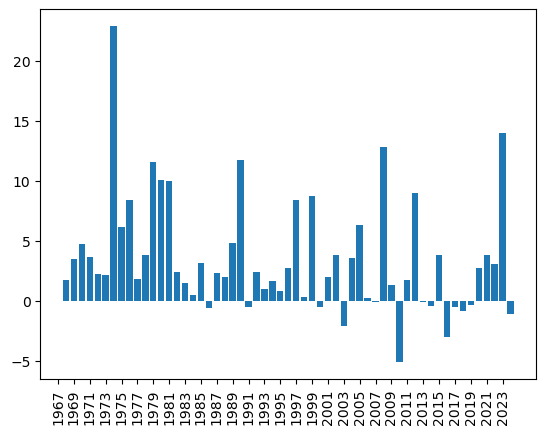

<Figure size 10000x6000 with 0 Axes>

In [10]:
plt.bar(annual_df["year"],annual_df["dairyi"])
plt.xticks(np.arange(1967, 2024, 2))
plt.xticks(rotation=90)
plt.figure(figsize=(100, 60)) 
plt.show()

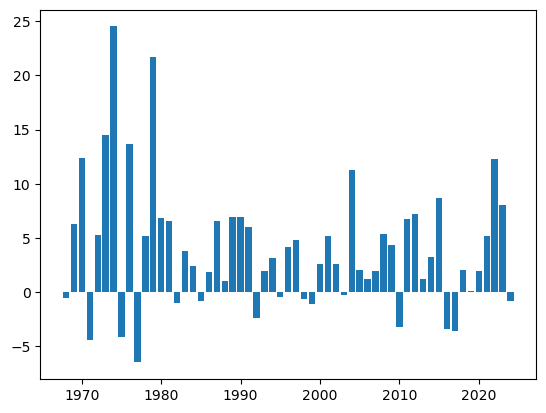

In [11]:
plt.bar(annual_df["year"],annual_df["mpi"])
plt.show()

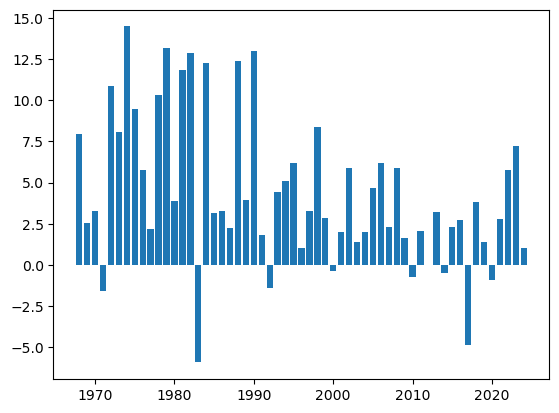

In [12]:
plt.bar(annual_df["year"],annual_df["fvi"])
plt.show()

In [25]:
inflation_df.head(10)

,observation_date,FPCPITOTLZGUSA
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
5,1965-01-01,1.585169
6,1966-01-01,3.015075
7,1967-01-01,2.772786
8,1968-01-01,4.271796
9,1969-01-01,5.462386


In [34]:
annual_df.tail()

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
53,2020-01-01,223.035,254.065,300.344,2020,2.743702,1.909717,-0.896846
54,2021-01-01,231.546,267.180,308.788,2021,3.815993,5.162065,2.811443
55,2022-01-01,238.675,299.916,326.518,2022,3.078870,12.252414,5.741803
56,2023-01-01,272.040,323.956,350.070,2023,13.979261,8.015578,7.213079
57,2024-01-01,268.941,321.230,353.786,2024,-1.139171,-0.841472,1.061502


In [20]:
inf_df = inflation_df.copy()

In [21]:
ann_df = annual_df.copy()

In [26]:
inf_df = inf_df.drop([0,1,2,3,4,5,6])

In [29]:
inf_df = inf_df.reset_index()


In [31]:
del inf_df["index"]

In [33]:
inf_df.tail()

,observation_date,FPCPITOTLZGUSA
52,2019-01-01,1.812210
53,2020-01-01,1.233584
54,2021-01-01,4.697859
55,2022-01-01,8.002800
56,2023-01-01,4.116338


In [35]:
annual_df = annual_df.drop(57)

In [37]:
inf_df["year"] = annual_df["year"]

In [39]:
inf_df.rename(columns={"FPCPITOTLZGUSA":"inflation rate"}, inplace=True)

In [41]:
del inf_df["observation_date"]

In [42]:
inf_df.head()

,inflation rate,year
0,2.772786,1967
1,4.271796,1968
2,5.462386,1969
3,5.838255,1970
4,4.292767,1971


In [43]:
main_df = pd.merge(inf_df, ann_df, on='year')

In [45]:
del main_df["date"]

In [46]:
main_df.head()

,inflation rate,year,dairycpi,mpfecpi,fvcpi,dairyi,mpi,fvi
0,2.772786,1967,39.9,38.1,32.8,NaN,NaN,NaN
1,4.271796,1968,40.6,37.9,35.4,1.754386,-0.524934,7.926829
2,5.462386,1969,42.0,40.3,36.3,3.448276,6.332454,2.542373
3,5.838255,1970,44.0,45.3,37.5,4.761905,12.406948,3.305785
4,4.292767,1971,45.6,43.3,36.9,3.636364,-4.415011,-1.600000


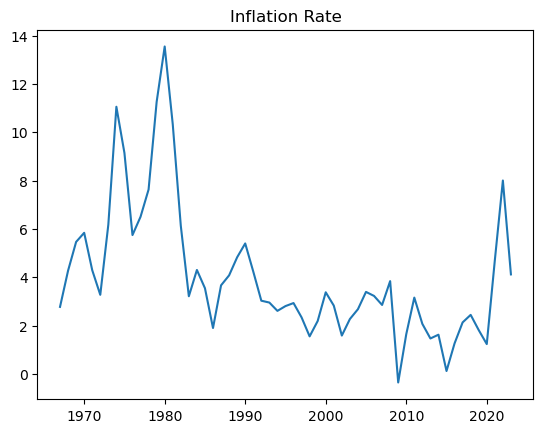

In [53]:
plt.plot(main_df["year"], main_df["inflation rate"])
plt.title("Inflation Rate")
#plt.plot(main_df["year"], main_df["dairyi"])
#plt.plot(main_df["year"], main_df["mpi"])
#plt.plot(main_df["year"], main_df["fvi"])
plt.show()

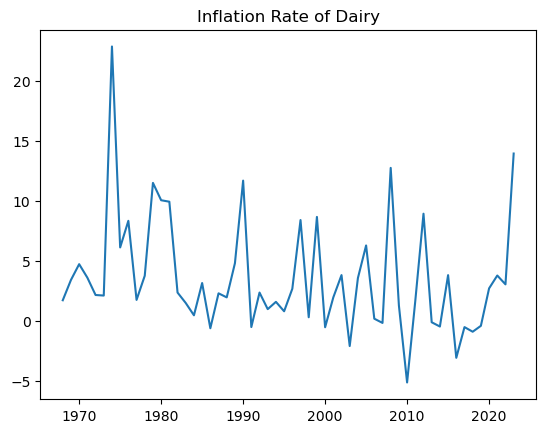

In [54]:
plt.plot(main_df["year"], main_df["dairyi"])
plt.title("Inflation Rate of Dairy")

#plt.plot(main_df["year"], main_df["mpi"])
#plt.plot(main_df["year"], main_df["fvi"])
plt.show()

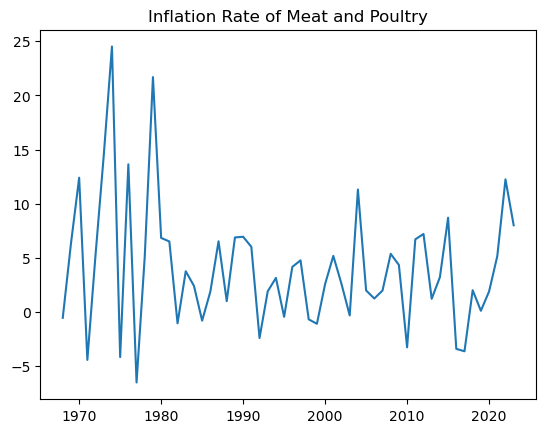

In [56]:
plt.plot(main_df["year"], main_df["mpi"])
plt.title("Inflation Rate of Meat and Poultry")
plt.show()

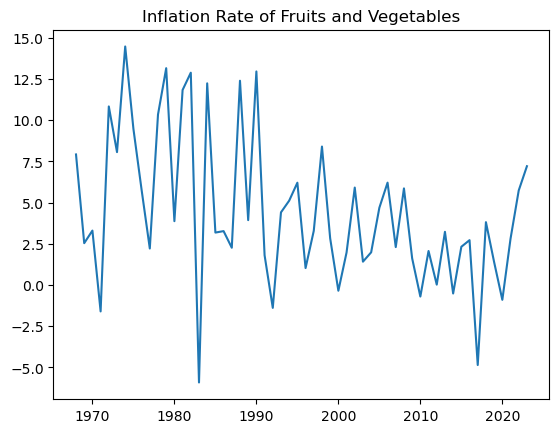

In [57]:
plt.plot(main_df["year"], main_df["fvi"])
plt.title("Inflation Rate of Fruits and Vegetables")
plt.show()

In [65]:
bymonth = monthly_df.copy()

In [66]:
bymonth["dairyi"] = ""
bymonth["mpi"] = ""
bymonth["fvi"] = ""

In [62]:
bymonth['date'] = pd.to_datetime(bymonth['date'], format='%m/%d/%Y')
bymonth["year"] = bymonth["date"].dt.year

In [67]:
bymonth["dairyi"] = bymonth["dairycpi"].pct_change() *100
bymonth["mpi"] = bymonth["mpfecpi"].pct_change() *100
bymonth["fvi"] = bymonth["fvcpi"].pct_change() *100
bymonth.head(10)

,date,dairycpi,mpfecpi,fvcpi,year,dairyi,mpi,fvi
0,1967-01-01,39.9,38.1,32.8,1967,NaN,NaN,NaN
1,1967-02-01,39.8,38.0,32.6,1967,-0.250627,-0.262467,-0.609756
2,1967-03-01,39.6,37.8,32.6,1967,-0.502513,-0.526316,0.000000
3,1967-04-01,39.6,37.5,32.1,1967,0.000000,-0.793651,-1.533742
4,1967-05-01,39.7,37.4,32.2,1967,0.252525,-0.266667,0.311526
5,1967-06-01,39.9,38.1,32.8,1967,0.503778,1.871658,1.863354
6,1967-07-01,39.9,38.0,33.7,1967,0.000000,-0.262467,2.743902
7,1967-08-01,40.0,38.2,34.1,1967,0.250627,0.526316,1.186944
8,1967-09-01,40.2,38.3,33.7,1967,0.500000,0.261780,-1.173021
9,1967-10-01,40.4,38.2,34.0,1967,0.497512,-0.261097,0.890208


In [76]:
stddairy_by_year = bymonth.groupby('year')['dairyi'].std()

In [77]:
stdmp_by_year = bymonth.groupby('year')['mpi'].std()

In [78]:
stdfv_by_year = bymonth.groupby('year')['fvi'].std()

In [79]:
stdfv_by_year

year
1967    1.286679
1968    1.011338
1969    1.523249
1970    1.273321
1971    1.796478
1972    1.985932
1973    2.064311
1974    3.243173
1975    2.464879
1976    1.619427
1977    2.935481
1978    1.549564
1979    1.422517
1980    1.533853
1981    1.683059
1982    2.138683
1983    1.787193
1984    2.126266
1985    1.445941
1986    1.855714
1987    1.771164
1988    1.482298
1989    1.361671
1990    2.761606
1991    2.861933
1992    2.231046
1993    2.269267
1994    2.199256
1995    2.032961
1996    1.244071
1997    1.511832
1998    1.655914
1999    0.861923
2000    0.875292
2001    1.461134
2002    1.438921
2003    0.866800
2004    1.729875
2005    1.737172
2006    1.280262
2007    1.272432
2008    1.232178
2009    0.511716
2010    1.275558
2011    1.154540
2012    0.677463
2013    0.636701
2014    0.683301
2015    0.647225
2016    0.728014
2017    0.766261
2018    0.649513
2019    0.631169
2020    0.414693
2021    0.422504
2022    0.657886
2023    0.571072
2024    0.492893
Name: fvi

In [80]:
std_df = pd.DataFrame({"STD Dairy":stddairy_by_year,
                       "STD Meat":stdmp_by_year,
                       "STD Fruit and Vegetables":stdfv_by_year})

In [81]:
std_df.head()

,STD Dairy,STD Meat,STD Fruit and Vegetables
year,,,
1967,0.324079,0.718504,1.286679
1968,0.332824,0.633984,1.011338
1969,0.305982,1.044653,1.523249
1970,0.225265,0.647542,1.273321
1971,0.224704,0.791243,1.796478


In [87]:
std_df = std_df.reset_index()

In [88]:
std_df.head()

,year,STD Dairy,STD Meat,STD Fruit and Vegetables
0,1967,0.324079,0.718504,1.286679
1,1968,0.332824,0.633984,1.011338
2,1969,0.305982,1.044653,1.523249
3,1970,0.225265,0.647542,1.273321
4,1971,0.224704,0.791243,1.796478


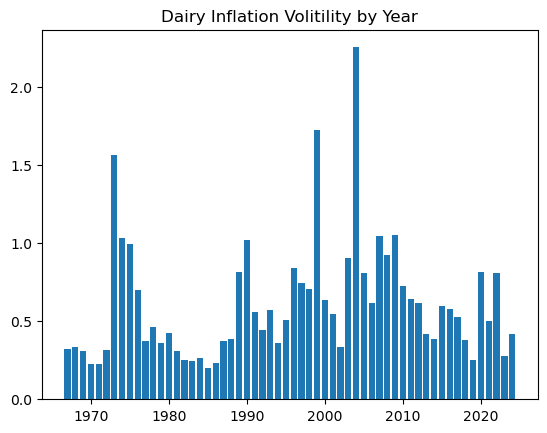

In [91]:
plt.bar(std_df['year'], std_df['STD Dairy'])
plt.title("Dairy Inflation Volitility by Year")
plt.show()

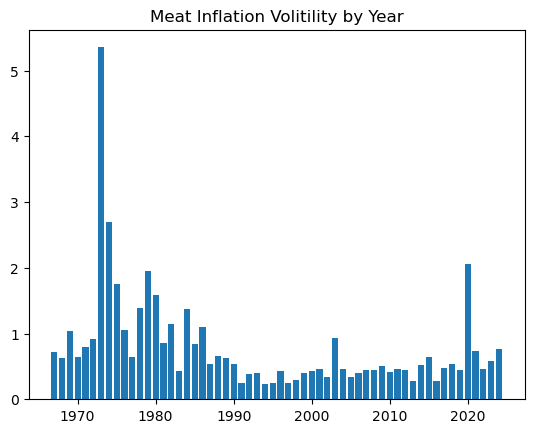

In [92]:
plt.bar(std_df['year'], std_df['STD Meat'])
plt.title("Meat Inflation Volitility by Year")
plt.show()

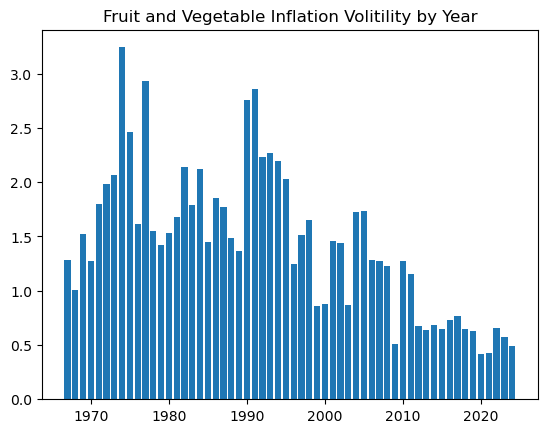

In [93]:
plt.bar(std_df['year'], std_df['STD Fruit and Vegetables'])
plt.title("Fruit and Vegetable Inflation Volitility by Year")
plt.show()

In [94]:
std_df.tail()

,year,STD Dairy,STD Meat,STD Fruit and Vegetables
53,2020,0.813584,2.058240,0.414693
54,2021,0.501610,0.737737,0.422504
55,2022,0.808552,0.456128,0.657886
56,2023,0.278018,0.584150,0.571072
57,2024,0.418050,0.765458,0.492893
